## Clustering of Countries

The problem statement aims to help an NGO to strategically plan and use the funds raised only for the poor nations.This requires clustering of countries on socio-economic and health factors and come up with the final list of poverty struck countries that are in dire need of aid.


In [1322]:
# Importing required libraries - all at one place for better segregation of the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

In [1323]:
#reading the data into a dataframe
df=pd.read_csv('Country-data.csv',encoding='iso-8859-1')

### Data Analysis

In [1324]:
#glance of the data
df.head() 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [1325]:
# glance of the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [1326]:
#shape
df.shape

(167, 10)

In [1327]:
#statistical view of the data
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [1328]:
# missing values
round(df.isnull().sum()/len(df))

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

#### Observations:

There are no missing values,no redundant columns

### Outlier Analysis:

In [1329]:
df.describe(percentiles=(0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99))

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
5%,3.460000,12.120000,2.791000,18.130000,1213.000000,0.183400,55.780000,1.390000,465.900000
10%,4.200000,15.660000,3.726000,22.520000,1524.000000,0.587800,57.820000,1.452000,593.800000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000


#### Observations:

There is a consistent increase of values between different percentiles(0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99) and a big difference between the 99th percentile data and the maximum value in all columns expect life_expec,total_fer.

But from the business context,only the outliers that are above the upper boundary(99th percentile) from the columns - income,gdpp have been dropped as higher the values in these columns,the better position that a country is in.

In contrary,the outliers in the other columns have been retained as they are required in arriving at countries that need aid.


In [1330]:
#Q1=df.quantile(0.25)
Q3=df.quantile(0.99)
#IQR=Q3-Q1
print(Q3)

child_mort      153.4000
exports         160.4800
health           13.4740
imports         146.0800
income        84374.0000
inflation        41.4780
life_expec       82.3700
total_fer         6.5636
gdpp          79088.0000
Name: 0.99, dtype: float64


In [1331]:
df.shape

(167, 10)

In [1332]:
df=df[df['income']!=125000]
df=df[df['gdpp']!=105000]

#### Correlation analysis

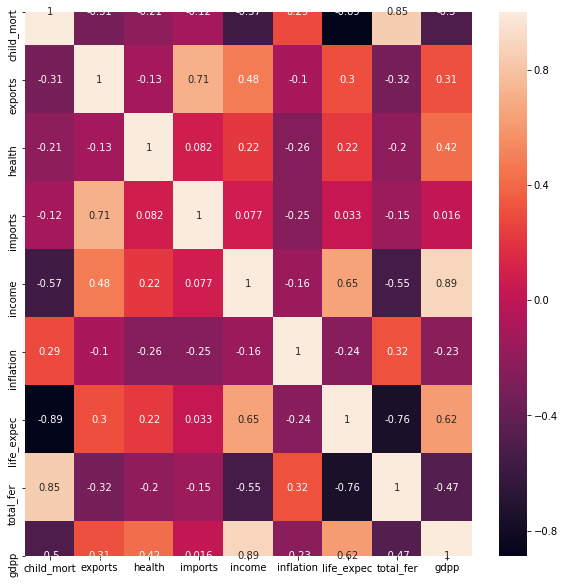

In [1333]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

#### Observations:

Highly correlated variables are:<br>

income,gdpp<br>
total_fer,child_mort<br>
exports ,imports<br>

Since PCA handles collinear variables,no column is manually dropped.

### Data Preprocessing

#### Scaling the features

In [1334]:
y_country=df.pop('country')
y_country

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 165, dtype: object

In [1335]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [1336]:
scaler = StandardScaler()
df.head()

scaled_df=scaler.fit_transform(df)
scaled_df

array([[ 1.27915582e+00, -1.18908695e+00,  2.71338484e-01, ...,
        -1.60815031e+00,  1.88899809e+00, -7.05606532e-01],
       [-5.47586454e-01, -4.79633374e-01, -1.06459118e-01, ...,
         6.62360758e-01, -8.66466592e-01, -4.88697275e-01],
       [-2.82013868e-01, -6.97268648e-02, -9.79428334e-01, ...,
         6.84952908e-01, -4.70957992e-02, -4.66006739e-01],
       ...,
       [-3.81293340e-01,  1.25458647e+00, -8.89197062e-05, ...,
         3.00886360e-01, -6.68231723e-01, -6.59182923e-01],
       [ 4.37762300e-01, -4.00805199e-01, -6.08966608e-01, ...,
        -3.31693837e-01,  1.12909776e+00, -6.59182923e-01],
       [ 1.10293476e+00, -1.24906587e-01, -3.48543019e-01, ...,
        -2.08258545e+00,  1.61146927e+00, -6.49984057e-01]])

### PCA

In [1337]:
pca = PCA(random_state=100)

In [1338]:
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [1339]:
pca.components_

array([[-0.42419524,  0.25283934,  0.17433631,  0.1285445 ,  0.40908329,
        -0.19415806,  0.43006947, -0.40806479,  0.39075658],
       [ 0.09299362,  0.6187954 , -0.25507413,  0.69272775, -0.04948555,
        -0.07290727, -0.15536888,  0.05562027, -0.16885645],
       [-0.12477783,  0.17705973, -0.65130457, -0.26331196,  0.18272196,
         0.62491638,  0.17086697, -0.07714906, -0.02223102],
       [ 0.37416373,  0.17826988,  0.30151276,  0.01337584,  0.42539511,
         0.3407132 , -0.20415358,  0.38366294,  0.50120861],
       [-0.19946553, -0.00928735,  0.54154878,  0.26619576, -0.2636476 ,
         0.65800436,  0.10759948, -0.16864542, -0.23128611],
       [ 0.20944156, -0.04174657, -0.00318201, -0.04525528,  0.155006  ,
         0.05882203, -0.60251282, -0.74932755,  0.01824648],
       [ 0.0014791 , -0.66501917, -0.29780398,  0.5896154 ,  0.03340244,
         0.11332149,  0.04967806, -0.01313776,  0.32375268],
       [ 0.71466433,  0.08622798, -0.01188666, -0.02022029, -0

In [1340]:
pca.explained_variance_ratio_

array([0.46240985, 0.176606  , 0.12728703, 0.1083954 , 0.06970008,
       0.02498896, 0.01377418, 0.0096064 , 0.0072321 ])

In [1341]:
cumsum_variance=np.cumsum(pca.explained_variance_ratio_)
cumsum_variance

array([0.46240985, 0.63901585, 0.76630288, 0.87469828, 0.94439836,
       0.96938732, 0.9831615 , 0.9927679 , 1.        ])

#### Plotting the Scree plot

Text(0, 0.5, 'Cumulative variance')

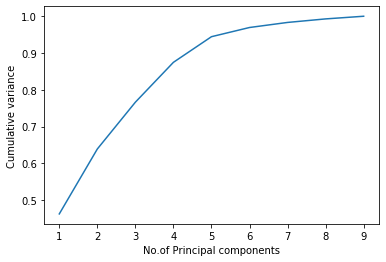

In [1342]:
plt.plot(range(1,len(cumsum_variance)+1),cumsum_variance)
plt.xlabel('No.of Principal components')
plt.ylabel('Cumulative variance')

#### since 90% variance is being explained by 5 principal components and as there is no much steep change after that,cosidering 5 PCs for clustering

In [1343]:
final_pcs=PCA(n_components=5,random_state=100)

In [1344]:
pca_data=final_pcs.fit_transform(scaled_df)

In [1345]:
pca_df=pd.DataFrame(pca_data,columns=['PC1','PC2','PC3','PC4','PC5'])

In [1346]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.932859,-0.226304,-0.998855,0.724676,-0.110254
1,0.460234,-0.283346,-0.044902,-1.299243,0.303274
2,-0.251213,-0.349803,1.417455,-0.628499,0.107204
3,-2.989712,1.309269,1.295702,1.451150,-0.531672
4,1.099167,0.405267,-0.000160,-0.786875,-0.155663


### Hopkins statistic for cluster tendency

In [1347]:
## Using the reusable block of code from session.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [1348]:
hop_df=pd.DataFrame(scaled_df)
hop_df

,0,1,2,3,4,5,6,7,8
0,1.279156,-1.189087,0.271338,-0.067400,-0.880606,0.153629,-1.608150,1.888998,-0.705607
1,-0.547586,-0.479633,-0.106459,0.093104,-0.372840,-0.313462,0.662361,-0.866467,-0.488697
2,-0.282014,-0.069727,-0.979428,-0.653024,-0.191582,0.782079,0.684953,-0.047096,-0.466007
3,1.993968,0.872270,-1.463596,-0.154159,-0.618789,1.376558,-1.167603,2.113664,-0.523040
4,-0.703952,0.210113,-0.297192,0.539913,0.186801,-0.601265,0.718841,-0.549291,0.008655
...,...,...,...,...,...,...,...,...,...
160,-0.234856,0.253469,-0.583291,0.270960,-0.798826,-0.489918,-0.840017,0.355982,-0.557382
161,-0.535177,-0.459926,-0.708001,-1.251661,0.028124,3.594060,0.560696,-0.324625,0.088378
162,-0.381293,1.254586,-0.000089,1.463897,-0.704841,0.404631,0.300886,-0.668232,-0.659183
163,0.437762,-0.400805,-0.608967,-0.522885,-0.705451,1.489792,-0.331694,1.129098,-0.659183


In [1349]:
hopk=hopkins(hop_df)
hopk

0.8771559686890116

#### Observation: 

Since the Hopkins value is 0.88 which is between 0.7 and 0.99,the data has high tendency for clustering and thus we can proceed with clustering.



### Finding the ideal number of clusters

Running elbow curve and silhouette score method on the data and observing the optimal number of clusters.

The list "ss_distance" holds the sum of squared distances of the data points.<br>
The list "silhoutte_score" holds the silhouette factor for the data points.

In [1350]:
ss_distance=[]
silhoutte_score=[]
clusters=range(2,7)
for k in clusters:
    kmns=KMeans(n_clusters=k)
    kmns=kmns.fit(pca_df)
    clus_ids=kmns.labels_
    silhoutte_score.append(silhouette_score(pca_df,clus_ids))
    #print(silhoutte_score)
    ss_distance.append(kmns.inertia_)

Text(0, 0.5, 'Sum of squared distance')

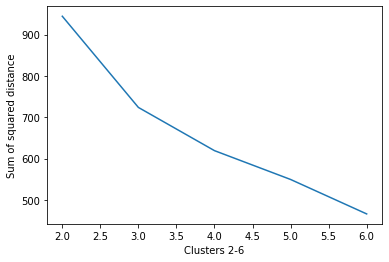

In [1351]:
ss_distance
plt.plot(clusters,ss_distance)
plt.xlabel('Clusters 2-6')
plt.ylabel('Sum of squared distance')


Text(0, 0.5, 'Silhouette score')

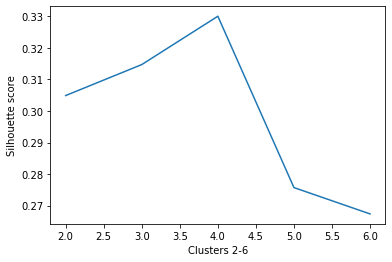

In [1352]:
plt.plot(clusters,silhoutte_score)
silhoutte_score
plt.xlabel('Clusters 2-6')
plt.ylabel('Silhouette score')


#### Observation:

From the above graphs,<br>
elbow curve suggests 3 as the optimal number of clusters.<br>
silhouette score plot suggests 5 as the optimal number of clusters.<br>

Hence, clustering the data with both the values of k's(3 and 5) and considering the final one based on the outcome.

### K-Means with 5 clusters

In [1353]:
kmeans=KMeans(n_clusters=5,random_state=100)

In [1354]:
kmeans.fit(pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [1355]:
kmeans.labels_

array([4, 2, 0, 4, 2, 0, 0, 3, 3, 0, 2, 2, 0, 2, 2, 3, 2, 4, 2, 0, 2, 0,
       0, 3, 2, 4, 4, 2, 4, 3, 2, 4, 4, 2, 0, 0, 4, 4, 4, 2, 4, 2, 3, 2,
       3, 0, 0, 0, 2, 4, 0, 2, 2, 3, 3, 0, 4, 2, 3, 4, 3, 2, 0, 4, 4, 2,
       4, 2, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 2, 0, 4, 4, 3, 2, 0, 2, 2, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 4, 1, 4, 2, 2, 2, 0, 2, 0, 4, 0, 4, 0, 3,
       3, 4, 4, 3, 2, 0, 2, 2, 0, 0, 2, 3, 2, 0, 4, 0, 0, 4, 2, 2, 4, 1,
       2, 2, 2, 0, 2, 3, 0, 2, 4, 2, 3, 3, 0, 4, 2, 4, 4, 0, 2, 0, 0, 4,
       2, 3, 3, 3, 0, 0, 0, 0, 2, 0, 4])

In [1356]:
pca_df['cluster_id_km_5']=kmeans.labels_
#pca_df_cluster=pca_df
#pca_df['cluster_id']=kmeans.labels_

In [1357]:

df['cluster_id_km_5']=kmeans.labels_
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id_km_5
0,-2.932859,-0.226304,-0.998855,0.724676,-0.110254,4
1,0.460234,-0.283346,-0.044902,-1.299243,0.303274,2
2,-0.251213,-0.349803,1.417455,-0.628499,0.107204,0
3,-2.989712,1.309269,1.295702,1.451150,-0.531672,4
4,1.099167,0.405267,-0.000160,-0.786875,-0.155663,2


#### Scatterplot of clusters for the first two principal components

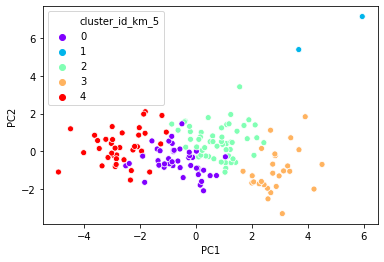

In [1358]:
sns.scatterplot(x='PC1',y='PC2',data=pca_df,hue='cluster_id_km_5',palette='rainbow',legend='full')

In [1359]:
df=pd.concat([df,y_country],axis=1)

In [1360]:
#df[df['cluster_id']==1].to_csv('cluster_1_countries.csv')

In [1361]:
#df[df['cluster_id_km_5']==4]

In [1362]:
df['cluster_id_km_5'].value_counts()

2    53
0    44
4    39
3    27
1     2
Name: cluster_id_km_5, dtype: int64

### K-Means with 3 clusters

In [1363]:
kmeans=KMeans(n_clusters=3,random_state=100)
kmeans.fit(pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [1364]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0,
       0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0,
       0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1])

In [1365]:
df['cluster_id_km_3']=kmeans.labels_

In [1366]:
pca_df['cluster_id_km_3']=kmeans.labels_

#### Scatterplot of clusters for the first two principal components

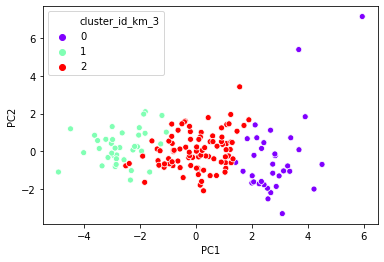

In [1367]:
sns.scatterplot(x='PC1',y='PC2',data=pca_df,hue='cluster_id_km_3',palette='rainbow')

In [1368]:
#df.to_csv('2_models_data.csv')

In [1369]:
#pca_df

In [1370]:
#df['cluster_id_km_5'].value_counts()

## Hierarchical clustering

We will observe the clusters generated using both the single and complete linkage methods of hierarchical clustering.


### Single linkage

In [1371]:
single_link=linkage(pca_df,method='single',metric='euclidean')

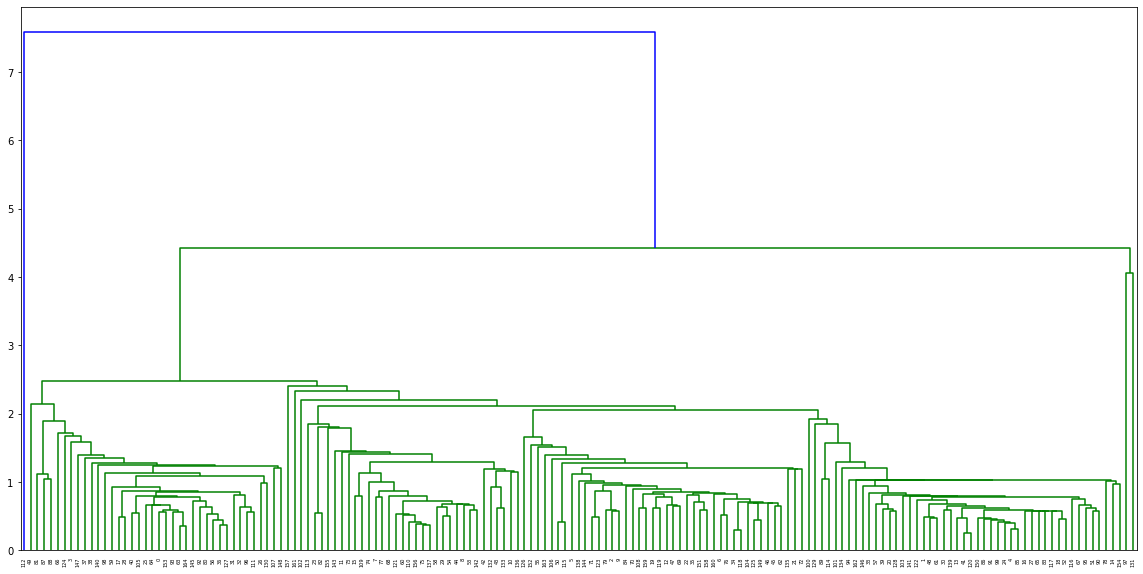

In [1372]:
plt.figure(figsize=(20,10))
dendrogram(single_link)
plt.show()

In [1373]:
cluster_labels=cut_tree(single_link,n_clusters=3).reshape(-1,)

In [1374]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [1375]:
cluster_labels_1=cut_tree(single_link,n_clusters=4).reshape(-1,)
cluster_labels_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

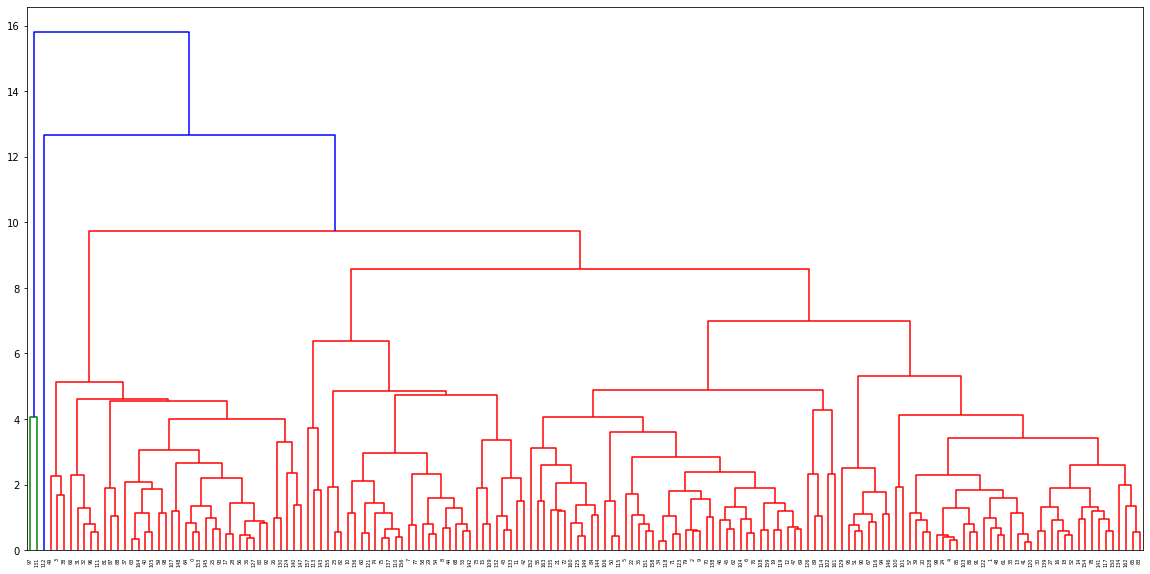

In [1376]:
plt.figure(figsize=(20,10))
complete_link=linkage(pca_df,method='complete',metric='euclidean')
dendrogram(complete_link)
plt.show()

In [1377]:
clus_labels=cut_tree(complete_link,n_clusters=3).reshape(-1,)

In [1378]:
clus_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [1379]:
df['Cluster_single']=cluster_labels
pca_df['Cluster_single']=cluster_labels


In [1380]:
df['cluster_complete']=clus_labels
pca_df['Cluster_complete']=clus_labels

In [1381]:
#df.head()

#### Scatter plot of hierarchical clustering results from single linkage

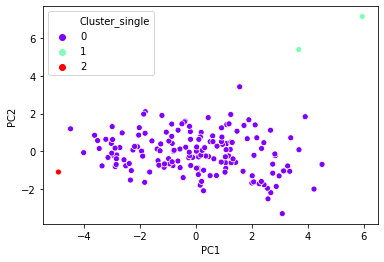

In [1382]:
#### Scatterplot of clusters for the first two principal components
sns.scatterplot(x='PC1',y='PC2',data=pca_df,hue='Cluster_single',palette='rainbow')

#### Scatter plot of hierarchical clustering results from complete linkage

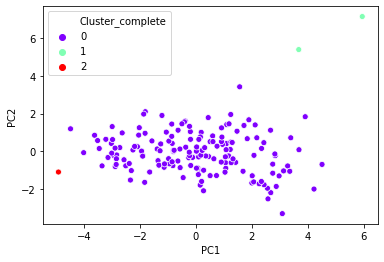

In [1383]:
#### Scatterplot of clusters for the first two principal components
sns.scatterplot(x='PC1',y='PC2',data=pca_df,hue='Cluster_complete',palette='rainbow')

#### Observations:

After analysing the clustering results both from K-Means and Hierarchical clustering(both single and complete),we can see that K-Means clustering produced better clusters(more balanced).Hence,considering the output from the K-Means clustering,we can arrive at the final list of countries for the given problem statement.

#### Cluster Analysis using Original Variables (5 clusters)

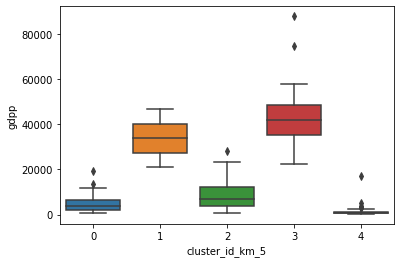

In [1384]:
sns.boxplot(x='cluster_id_km_5',y='gdpp',data=df)

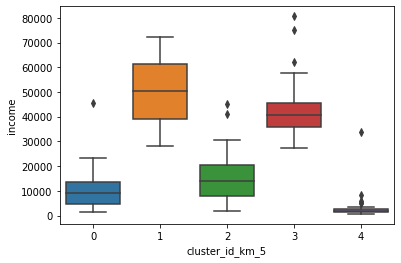

In [1385]:
sns.boxplot(x='cluster_id_km_5',y='income',data=df)

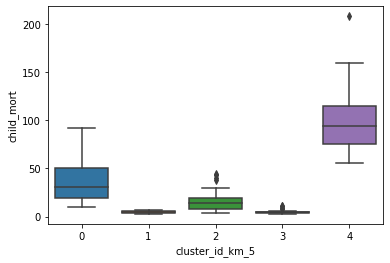

In [1386]:
sns.boxplot(x='cluster_id_km_5',y='child_mort',data=df)

#### Cluster Analysis using Original Variables (3 clusters)

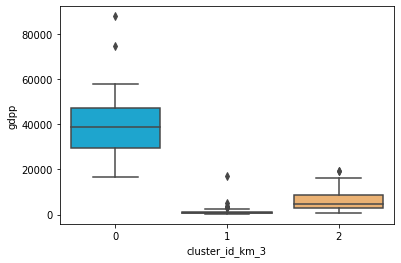

In [1387]:
sns.boxplot(x='cluster_id_km_3',y='gdpp',data=df,palette='rainbow')

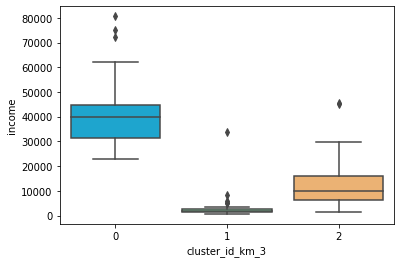

In [1388]:
sns.boxplot(x='cluster_id_km_3',y='income',data=df,palette='rainbow')

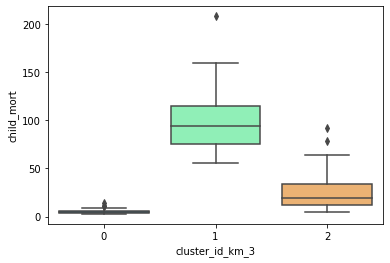

In [1389]:
sns.boxplot(x='cluster_id_km_3',y='child_mort',data=df,palette='rainbow')

In [1390]:
df['cluster_id_km_3'].value_counts()

2    91
1    39
0    35
Name: cluster_id_km_3, dtype: int64

In [1391]:
#checking if cluster 1 data from k=3 is exactly same as cluster 4 data from k=5 , and its an exact match
df[df['cluster_id_km_3']==1]['cluster_id_km_5'].value_counts()

4    39
Name: cluster_id_km_5, dtype: int64

#### Observations:

As we have same set of 39 under-developed countries generated using K-means with k=3 and k=5,considering the resultant from k=3 clusters data.

In [1392]:
## selecting top 5 countries

df[df['cluster_id_km_3']==1].sort_values(['gdpp','income','child_mort'],ascending=[True,True,False])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_km_5,country,cluster_id_km_3,Cluster_single,cluster_complete
26,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,4,Burundi,1,0,0
88,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327,4,Liberia,1,0,0
37,116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,4,"Congo, Dem. Rep.",1,0,0
112,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348,4,Niger,1,0,0
132,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,4,Sierra Leone,1,0,0
93,62.2,25.00,3.77,43.0,1390,8.790,60.8,4.60,413,4,Madagascar,1,0,0
106,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419,4,Mozambique,1,0,0
31,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,4,Central African Republic,1,0,0
94,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,4,Malawi,1,0,0
150,90.3,40.20,7.65,57.3,1210,1.180,58.7,4.87,488,4,Togo,1,0,0


### Final list of countries

From the 39 countries which are in need of aid,considering the top 5 countries based on low income,gdpp and high child mortality rate,we arrive at the following.

1.Burundi<br>
2.Liberia<br>
3.Congo, Dem. Rep.<br>
4.Niger<br>
5.Sierra Leone<br>
